# Aula 05


In [1]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import RSLPStemmer
from sklearn import metrics
import matplotlib.pyplot as plt
import re
#Algoritmo de stem para português com descrição disponível em: https://ieeexplore.ieee.org/document/989755

In [2]:
link = 'https://github.com/FLS-6497/datasets/raw/main/aula5/discursos_presidenciais.csv'
discursos = pd.read_csv(link, sep=';')

## a) Pré-processamento
Usando ferramentas de processamento de texto, implemente uma pequena pipeline para limpar dados e, quando estiver satisfeito com ela, crie uma função que aplique ela em uma nova lista textos.
# b) Modelo
Usando os frameworks de aprendizado de máquina, use a bag of words criada anteriormente para treinar algum modelo de classificação para predizer o nome do ou da presidente que proferiu cada discurso na amostra de teste.

In [3]:
Base_discursos = discursos
Base_discursos.head()

,data,presidente,discurso,planalto
0,2012-12-16,Dilma,"Boa noite, povo de Fortaleza e povo do Ceará.\...",Outros locais
1,2015-10-09,Dilma,(Falha no áudio)... Luis Filipe de Carvalho Mo...,Outros locais
2,2013-06-14,Dilma,"Boa tarde, queridos trabalhadores, queridas tr...",Outros locais
3,2011-03-22,Dilma,Vocês viram o Omar ficando vermelho? Pois ele ...,Outros locais
4,2015-12-22,Dilma,Eu queria começar cumprimentando aqui os traba...,Outros locais


In [4]:
def token_stem(texto):
    tokens = word_tokenize(texto,language="portuguese")
    tokens = [t for t in tokens if len(t) > 4]
    #tokens = [re.sub(r'[^\w\s]','',t) for t in tokens]
    #    minusculo = [t.lower() for t in tokens]
    stem = RSLPStemmer()
    token_stem = [stem.stem(t) for t in tokens]


    return token_stem

def Contagemtdf(base,coluna_Y = "presidente"):
    Base_discursos = base
    coluna_X = "discurso"   
    X_train, X_test, Y_train, Y_test = train_test_split(Base_discursos[coluna_X], Base_discursos[coluna_Y], test_size=0.7)
    tfid_1 = TfidfVectorizer(tokenizer=token_stem)
    X_train_corpus = tfid_1.fit_transform(X_train) 
    X_test_corpus = tfid_1.transform(X_test)    
    return X_train_corpus, X_test_corpus, Y_train, Y_test

def RodarModelo(X_train_corpus, X_test_corpus, Y_train, Y_test): 

    nb_classifier = MultinomialNB()   
    nb_classifier.fit(X_train_corpus, Y_train)    
    pred = nb_classifier.predict(X_test_corpus)
    score = metrics.accuracy_score(Y_test,pred)
    cm = metrics.confusion_matrix(Y_test,pred,labels=Y_test.unique())
    
    return score,cm, Y_test, pred, nb_classifier

In [5]:
#teste do modelo
X_train_corpus, X_test_corpus, Y_train, Y_test = Contagemtdf(Base_discursos)


In [6]:
score, cm, Y_test, pred, nb_classifier = RodarModelo(X_train_corpus, X_test_corpus, Y_train, Y_test)
print(score,"\n", cm)

0.9428571428571428 
 [[201   6]
 [ 18 195]]


## c) Validação
Roda o item pedido em b) 100 vezes e salve os resultados de alguma métrica de validação.



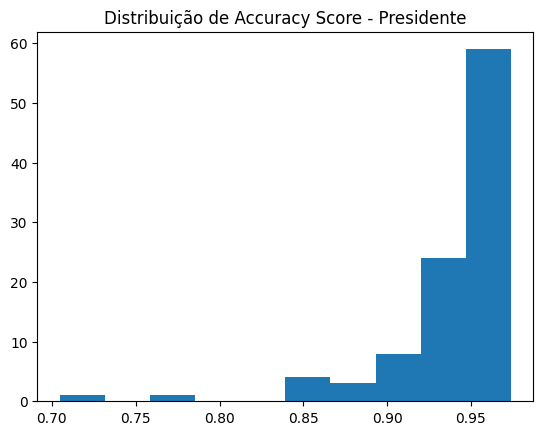

In [7]:
lista_score = []
tentativas = range(1,101)

for i in tentativas:
    X_train_corpus, X_test_corpus, Y_train, Y_test = Contagemtdf(Base_discursos)
    score, cm, Y_test, pred, nb_classifier = RodarModelo(X_train_corpus, X_test_corpus, Y_train, Y_test)
    lista_score.append(score)

plt.hist(lista_score)
plt.title("Distribuição de Accuracy Score - Presidente")
plt.show()


## c) Validação II
Repita o exercício c), dessa vez usando a variável planalto, que indica se um discurso foi proferido no Palácio do Planalto, como target.

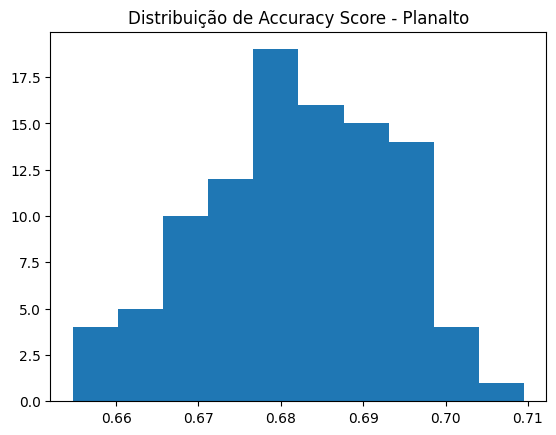

In [8]:
lista_score = []
tentativas = range(1,101)

for i in tentativas:
    X_train_corpus, X_test_corpus, Y_train, Y_test = Contagemtdf(Base_discursos, coluna_Y = "planalto")
    score, cm, Y_test, pred, nb_classifier = RodarModelo(X_train_corpus, X_test_corpus, Y_train, Y_test)
    lista_score.append(score)

plt.hist(lista_score)
plt.title("Distribuição de Accuracy Score - Planalto")
plt.show()


## 2) Evitando data leaks
Como vimos, pré-processamento deve ser aplicado antes de fazermos split sample de validação (i.e., criar amostras de teste e de treino). Agora, implemente um workflow que leva isso em conta. Para tanto, você deverá criar uma função que separe textos em treino e teste, que aplique pré-processamento apenas na amostra de treino e que, depois, replique ele na amostra de teste para, então, rodar um algoritmo e calcular alguma métrica de validação.

Realizado

## 3) Benchmark
Usando as ferramentas que vimos, experimente com os seguintes pré-processamentos:

* Usando apenas palavras maiores do que 4 caracteres;
* Removendo palavras que não ocorrem em, pelo menos, 10 documentos;
* Removendo palavras que não ocorrem em, pelo menos, 10% dos documentos;
* Usando TF-IDF para normalizar os elementos da matriz bag of words;

In [9]:
def token_stem(texto):
    tokens = word_tokenize(texto,language="portuguese")
    tokens = [t for t in tokens if len(t) > 4]
    #tokens = [re.sub(r'[^\w\s]','',t) for t in tokens]
    #    minusculo = [t.lower() for t in tokens]
    stem = RSLPStemmer()
    token_stem = [stem.stem(t) for t in tokens]


    return token_stem

def Contagemtdf(base,coluna_Y = "presidente"):
    Base_discursos = base
    coluna_X = "discurso"   
    X_train, X_test, Y_train, Y_test = train_test_split(Base_discursos[coluna_X], Base_discursos[coluna_Y], test_size=0.7)
    tfid_1 = TfidfVectorizer(tokenizer=token_stem, min_df=0.1)
    X_train_corpus = tfid_1.fit_transform(X_train) 
    X_test_corpus = tfid_1.transform(X_test)    
    return X_train_corpus, X_test_corpus, Y_train, Y_test

def RodarModelo(X_train_corpus, X_test_corpus, Y_train, Y_test): 

    nb_classifier = MultinomialNB()   
    nb_classifier.fit(X_train_corpus, Y_train)    
    pred = nb_classifier.predict(X_test_corpus)
    score = metrics.accuracy_score(Y_test,pred)
    cm = metrics.confusion_matrix(Y_test,pred,labels=Y_test.unique())
    
    return score,cm, Y_test, pred, nb_classifier

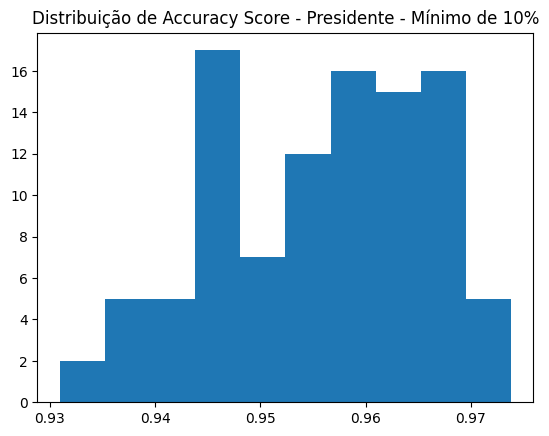

In [10]:
lista_score = []
tentativas = range(1,101)

for i in tentativas:
    X_train_corpus, X_test_corpus, Y_train, Y_test = Contagemtdf(Base_discursos)
    score, cm, Y_test, pred, nb_classifier = RodarModelo(X_train_corpus, X_test_corpus, Y_train, Y_test)
    lista_score.append(score)

plt.hist(lista_score)
plt.title("Distribuição de Accuracy Score - Presidente - Mínimo de 10%")
plt.show()
